In [5]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import networkx as nx

import matplotlib.pyplot as plt

# import data

df = pd.read_csv("test_banking_sample_output.csv")

# extract subject

kg_df = df

# to print edg
edg_dict = {}
for index, row in df.iterrows():
  edg_dict[(row['source'],row['target'])] = row['edge']

### Build a Knowledge Graph
# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(kg_df, "source", "target",
                          edge_attr=True, create_using=nx.MultiDiGraph())




# G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="use"], "source", "target",
#                          edge_attr=True, create_using=nx.MultiDiGraph())

#plt.figure(figsize=(12,12))
#pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
#nx.draw(G, with_labels=True, node_color='red', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos, font_weight='bold')
#plt.show()


In [2]:
print(df)

                source                 target       edge
0          transaction              bank card  fail_with
1            bank card  bank card transaction       fail
2                 bank  bank card transaction  authorise
3                 bank              bank card  authorise
4         card payment              bank card        use
5  card payment record      bank card payment        use


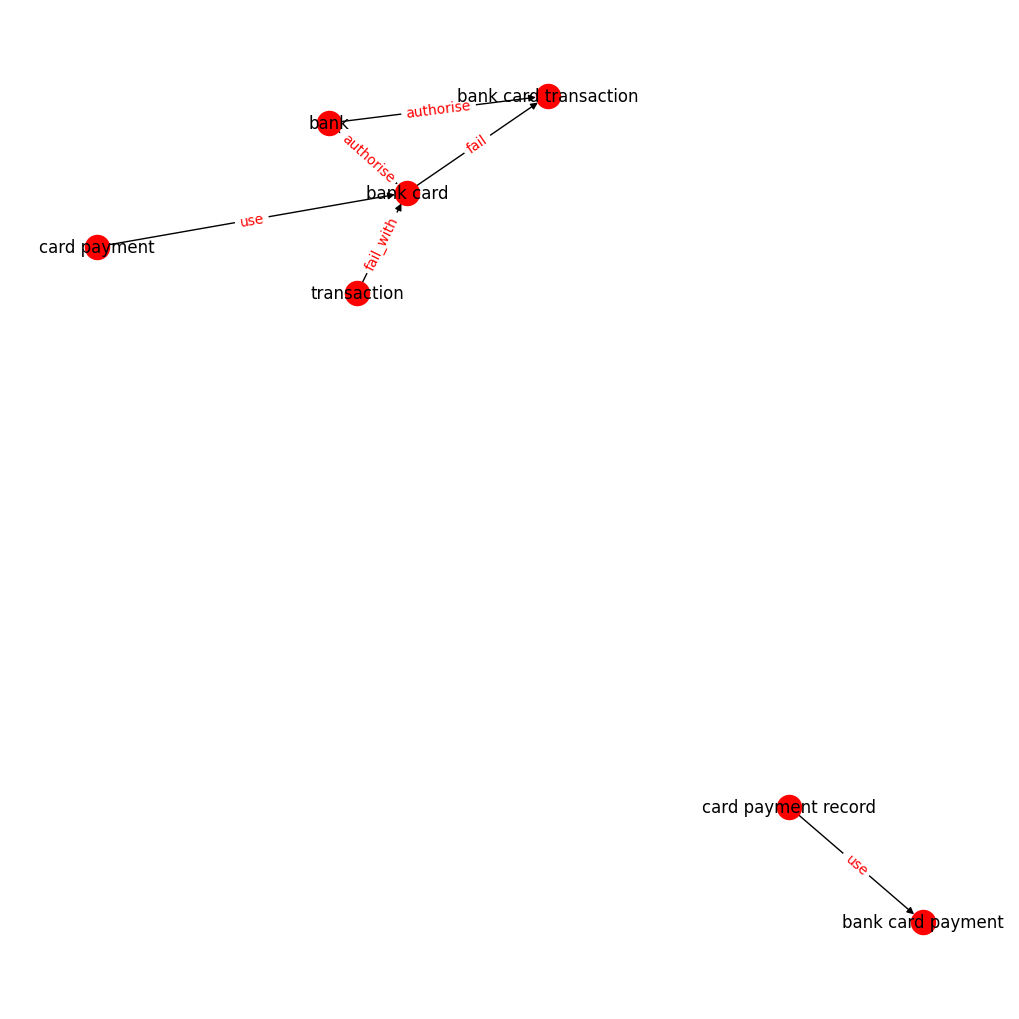

In [10]:
plt.figure(figsize=(10,10))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='red', edge_cmap=plt.cm.Blues, pos = pos)

nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edg_dict,
    font_color='red'
)


plt.show()

In [6]:
pip install rdflib

In [7]:
from rdflib import Graph, Namespace, Literal
from rdflib.namespace import RDF, RDFS

# Create a new RDF graph
graph = Graph()

# Define the namespace
ns = Namespace("http://example.org/")

# Define the RDF types
rdf_type = RDF.type
source_type = ns.source
target_type = ns.target
edge_property = ns.has_edge



# Convert data to RDF
for index, entry in df.iterrows():
    source = ns[entry["source"].replace(" ", "_")]
    target = ns[entry["target"].replace(" ", "_")]
    edge = ns[entry["edge"].replace(" ", "_")]

    graph.add((source, rdf_type, source_type))
    graph.add((target, rdf_type, target_type))
    graph.add((source, edge_property, edge))
    graph.add((source, ns.has_target, target))

# Serialize RDF graph to a file
graph.serialize(destination="output.rdf", format="nt")

/usr/local/lib/python3.10/dist-packages/rdflib/plugins/serializers/nt.py:40: UserWarning: NTSerializer always uses UTF-8 encoding. Given encoding was: None
  warnings.warn(


<Graph identifier=N749be1a5cec24a2dab0780ccde3b279b (<class 'rdflib.graph.Graph'>)>

In [8]:
graph.serialize(destination="output.rdf", format="nt")

<Graph identifier=N749be1a5cec24a2dab0780ccde3b279b (<class 'rdflib.graph.Graph'>)>

In [9]:
print(graph.serialize(format='nt'))

<http://example.org/transaction> <http://example.org/has_edge> <http://example.org/fail_with> .
<http://example.org/card_payment_record> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://example.org/source> .
<http://example.org/bank_card_payment> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://example.org/target> .
<http://example.org/bank> <http://example.org/has_target> <http://example.org/bank_card_transaction> .
<http://example.org/bank> <http://example.org/has_target> <http://example.org/bank_card> .
<http://example.org/card_payment_record> <http://example.org/has_edge> <http://example.org/use> .
<http://example.org/bank_card> <http://example.org/has_edge> <http://example.org/fail> .
<http://example.org/bank_card> <http://example.org/has_target> <http://example.org/bank_card_transaction> .
<http://example.org/bank> <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://example.org/source> .
<http://example.org/card_payment> <http://example.org/has_target> <ht

In [10]:
print(graph.serialize(format='turtle'))

@prefix ns1: <http://example.org/> .

ns1:bank a ns1:source ;
    ns1:has_edge ns1:authorise ;
    ns1:has_target ns1:bank_card,
        ns1:bank_card_transaction .

ns1:card_payment a ns1:source ;
    ns1:has_edge ns1:use ;
    ns1:has_target ns1:bank_card .

ns1:card_payment_record a ns1:source ;
    ns1:has_edge ns1:use ;
    ns1:has_target ns1:bank_card_payment .

ns1:transaction a ns1:source ;
    ns1:has_edge ns1:fail_with ;
    ns1:has_target ns1:bank_card .

ns1:bank_card_payment a ns1:target .

ns1:bank_card_transaction a ns1:target .

ns1:bank_card a ns1:source,
        ns1:target ;
    ns1:has_edge ns1:fail ;
    ns1:has_target ns1:bank_card_transaction .




In [11]:
print(graph.serialize(format='xml'))

<?xml version="1.0" encoding="utf-8"?>
<rdf:RDF
   xmlns:ns1="http://example.org/"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
>
  <rdf:Description rdf:about="http://example.org/transaction">
    <rdf:type rdf:resource="http://example.org/source"/>
    <ns1:has_edge rdf:resource="http://example.org/fail_with"/>
    <ns1:has_target rdf:resource="http://example.org/bank_card"/>
  </rdf:Description>
  <rdf:Description rdf:about="http://example.org/card_payment_record">
    <rdf:type rdf:resource="http://example.org/source"/>
    <ns1:has_edge rdf:resource="http://example.org/use"/>
    <ns1:has_target rdf:resource="http://example.org/bank_card_payment"/>
  </rdf:Description>
  <rdf:Description rdf:about="http://example.org/bank_card_payment">
    <rdf:type rdf:resource="http://example.org/target"/>
  </rdf:Description>
  <rdf:Description rdf:about="http://example.org/bank">
    <rdf:type rdf:resource="http://example.org/source"/>
    <ns1:has_edge rdf:resource="http://examp

In [12]:
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgraphviz-dev is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


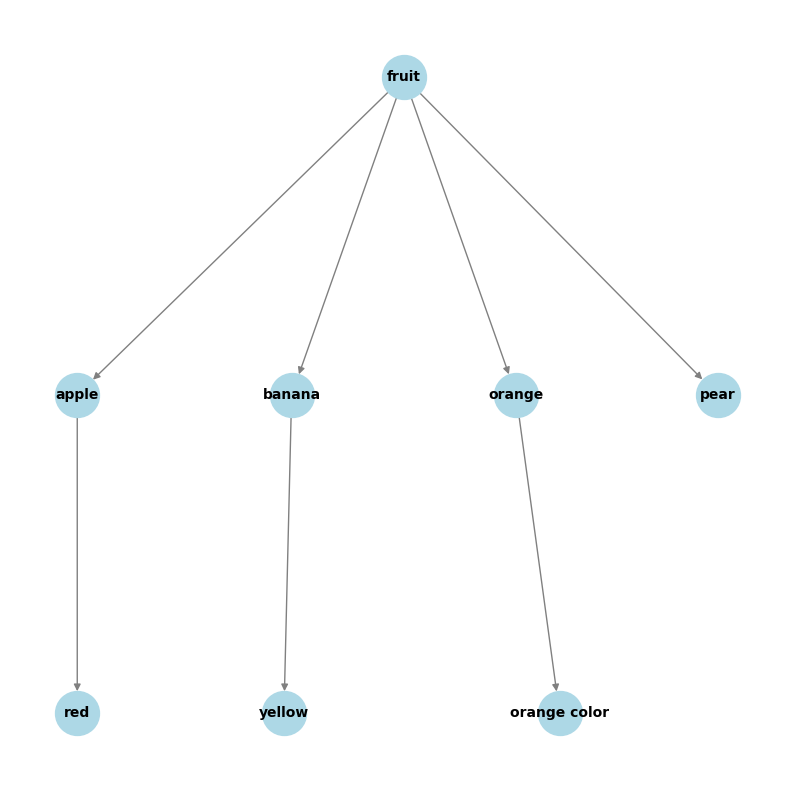

In [13]:

import networkx as nx
import matplotlib.pyplot as plt
import pydot
import rdflib
import pygraphviz
class Node:
    def __init__(self, name):
        self.name = name
        self.children = []
    def add_child(self, child):
        self.children.append(child)
def construct_tree(triples):
    node_map = {}
    root = None
    # Create nodes and store them in a dictionary for easy access
    for parent_name, relation, child_name in triples:
        if parent_name not in node_map:
            parent_node = Node(parent_name)
            node_map[parent_name] = parent_node
            if not root:
                root = parent_node
        else:
            parent_node = node_map[parent_name]
        if child_name not in node_map:
            child_node = Node(child_name)
            node_map[child_name] = child_node
        else:
            child_node = node_map[child_name]
        parent_node.add_child(child_node)
    return root
def build_graph(node, graph):
    for child in node.children:
        graph.add_edge(node.name, child.name)
        build_graph(child, graph)
# Example usage
triples = [('fruit', 'is_a', 'apple'),
           ('fruit', 'is_a', 'banana'),
           ('fruit', 'is_a', 'orange'),
           ('fruit', 'is_a', 'pear'),
           ('apple', 'is_a', 'red'),
           ('banana', 'is_a', 'yellow'),
           ('orange', 'is_a', 'orange color')]
tree_root = construct_tree(triples)
# Build the graph
graph = nx.DiGraph()
build_graph(tree_root, graph)
# Plot the graph
plt.figure(figsize=(10,10))
#pos = nx.spring_layout(graph)
pos = nx.nx_agraph.graphviz_layout(graph, prog="dot")
nx.draw_networkx(graph, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray', arrows=True)
plt.axis('off')
plt.show()

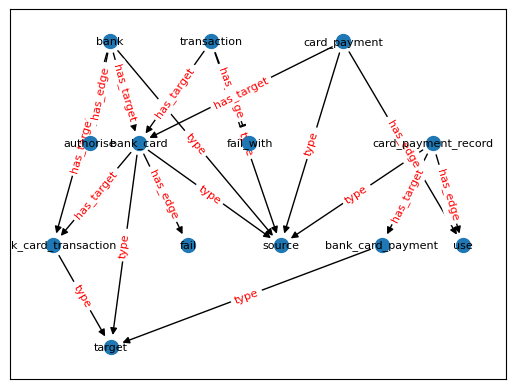

<Figure size 2000x2000 with 0 Axes>

In [14]:
import pydot
import rdflib
import pygraphviz
import networkx as nx
import matplotlib.pyplot as plt
rdf_file = "/content/output.rdf"
g = rdflib.Graph()
g.parse(rdf_file, format="nt")
graph = nx.DiGraph()
# Iterate through RDF triples and add nodes and edges
for subject, predicate, obj in g:
    graph.add_edge(subject, obj, label=predicate)
# Extract labels from URIs for nodes and edges
node_labels = {node: node.split("/")[-1] for node in graph.nodes()}
edge_labels = {edge: data["label"].split("/")[-1].split('#')[-1] for edge, data in graph.edges.items()}
pos = nx.nx_agraph.graphviz_layout(graph, prog="dot")
# Draw nodes with labels
nx.draw_networkx_nodes(graph, pos, node_size=100)
nx.draw_networkx_labels(graph, pos, labels=node_labels, font_size=8, font_color='black')
# Draw edges and edge labels
nx.draw_networkx_edges(graph, pos)
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=8, font_color='red')
plt.figure(figsize=(20,20))
plt.show()